<a href="https://colab.research.google.com/github/ayushranjan6456/HydrogenPrediction/blob/main/Hydrogen_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/gdrive/My Drive/dataset/interpolated_merged.csv')

#Drop the unnamed column with index of all 7 cycles individually
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

df

,time,pH,VFA,COD,Gas
0,0.000000,6.000000,3.310000,11.200000,0.000000
1,0.241206,5.998204,3.310584,11.227403,0.179567
2,0.482412,5.996256,3.311476,11.251849,0.366206
3,0.723618,5.994160,3.312668,11.273404,0.559677
4,0.964824,5.991923,3.314152,11.292135,0.759741
...,...,...,...,...,...
1395,47.035176,4.947926,4.731427,6.214625,44.151661
1396,47.276382,4.936978,4.742158,6.144786,44.818456
1397,47.517588,4.925355,4.753809,6.072439,45.514966
1398,47.758794,4.913037,4.766412,5.997529,46.241908


Text(0.5, 1.0, 'Gas vs COD')

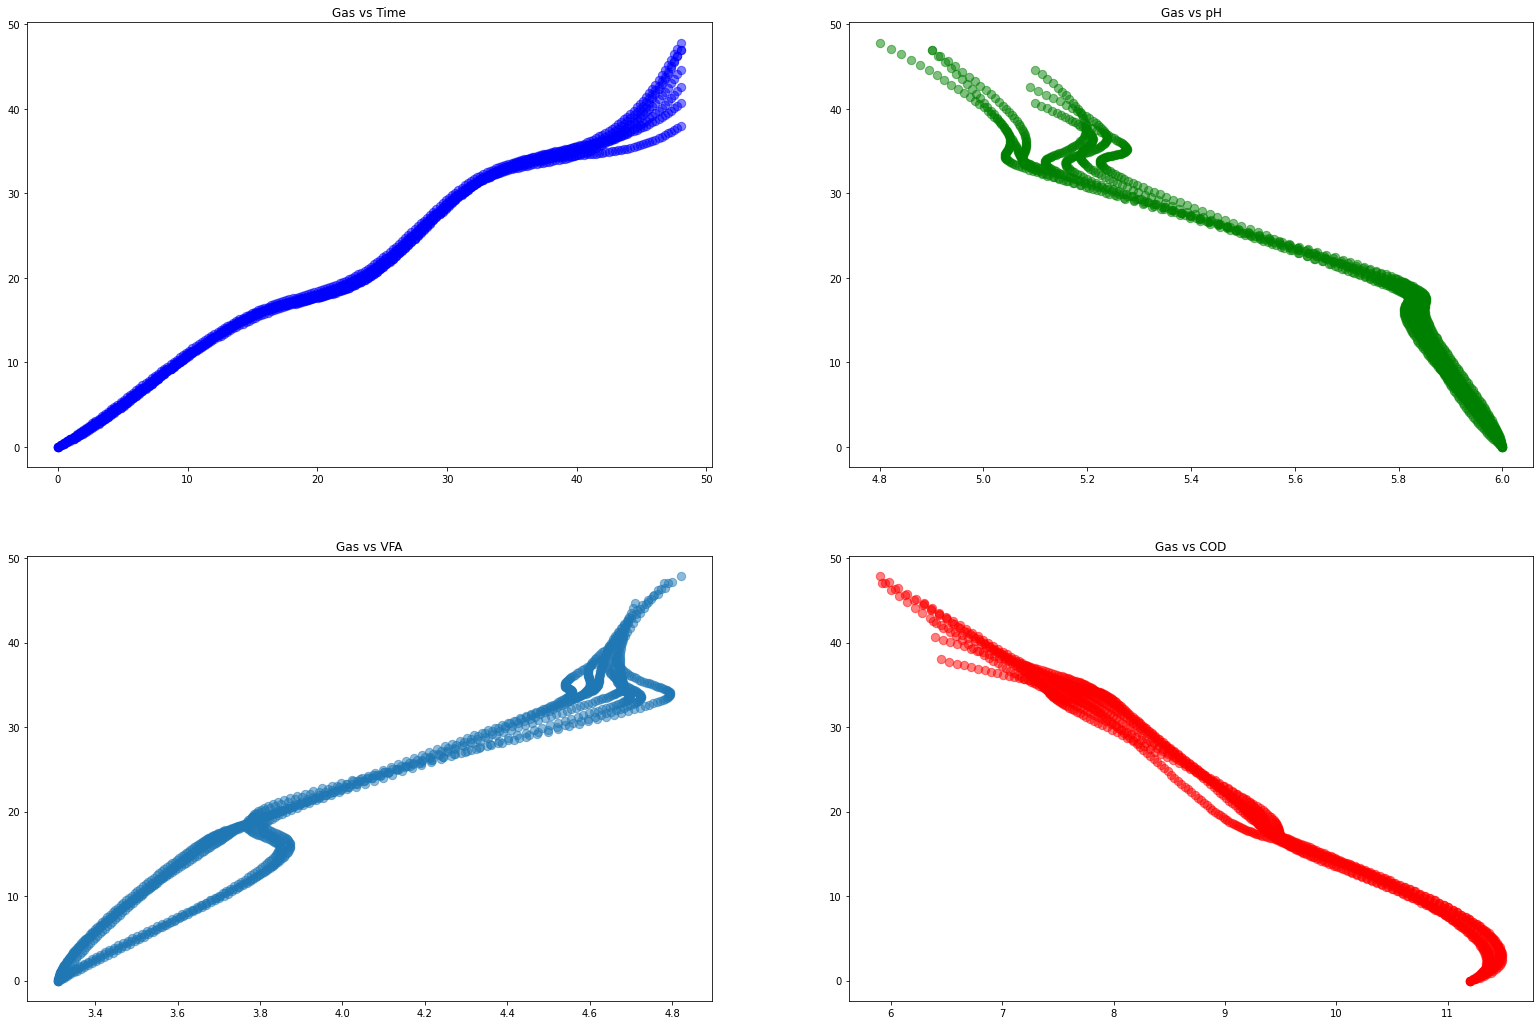

In [4]:

f = plt.figure()
f.set_figwidth(27)
f.set_figheight(18)
x1=df['time']
x2=df['pH']
x3=df['VFA']
x4=df['COD']
y=df['Gas']

plt.subplot(2, 2, 1)
plt.scatter(x1, y, c='blue', s=70, alpha=0.5)
plt.title("Gas vs Time")

plt.subplot(2, 2, 2)
plt.scatter(x2, y, c='green', s=70, alpha=0.5)
plt.title("Gas vs pH")

plt.subplot(2, 2, 3)
plt.scatter(x3, y, s=70, alpha=0.5)
plt.title("Gas vs VFA")

plt.subplot(2, 2, 4)
plt.scatter(x4, y, c='red', s=70, alpha=0.5)
plt.title("Gas vs COD")

In [5]:
#Correlation matrix

corr = df.corr()
corr.style.background_gradient(cmap='RdYlBu')

,time,pH,VFA,COD,Gas
time,1.000000,-0.941447,0.960664,-0.990506,0.993345
pH,-0.941447,1.000000,-0.982834,0.942638,-0.955266
VFA,0.960664,-0.982834,1.000000,-0.963258,0.972064
COD,-0.990506,0.942638,-0.963258,1.000000,-0.992803
Gas,0.993345,-0.955266,0.972064,-0.992803,1.000000


# Splitting the dataset into training and testing

In [26]:
from sklearn.model_selection import train_test_split

# input
x = df.iloc[:, [0,1,2,3]].values

# output
y = df.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


In [27]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

# Now, it is very important to perform feature scaling here because pH, time, COD, VFA values lie in different ranges. 
# If we don’t scale the features then the some features will dominate the other when the model finds the nearest neighbor to a data point in the data space. 
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

#Here all features values are scaled so now mean = 0 and S.D = 1.
print (X_train[0:10, :])


[[-0.49620987  0.70457028 -0.78784113  0.37637868]
 [-0.35814551  0.78834299 -0.50708122  0.29523389]
 [-1.11749946  0.9230857  -0.79709932  1.21407988]
 [-1.53169253  1.17896588 -1.47578524  1.53870625]
 [-1.65249884  1.22611075 -1.47063408  1.50999719]
 [ 1.69556177 -1.83628434  1.45596103 -1.96376874]
 [-0.91040293  0.88209167 -0.98921518  0.91270077]
 [ 0.50475671 -0.84512817  0.66404414 -0.54968638]
 [ 1.21233653 -1.14333915  1.2972963  -1.07412028]
 [-1.20378969  0.96529894 -0.92903425  1.33290017]]


# Train the ML model (Linear Regression)

In [28]:
from sklearn import datasets, linear_model, metrics
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_train, y_train)
# regression coefficients
print('Coefficients: ', reg.coef_)

y_pred = reg.predict(X_test)
  
# variance score: 1 means perfect prediction
print('\nVariance score: {}\n'.format(reg.score(X_test, y_test)))

from sklearn import metrics

print('Mean Absolute error: {}\n'.format(metrics.mean_absolute_error(y_test,y_pred)))
print('Mean Squared error: {}\n'.format(metrics.mean_squared_error(y_test,y_pred)))
print('Root Mean Squared error: {}\n'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))
print('\nAccuracy: {}%\n'.format(round(reg.score(X_test, y_test)*100, 2)))


Coefficients:  [ 5.57370303 -0.77904712  1.36332769 -4.47474371]

Variance score: 0.9925894199667186

Mean Absolute error: 0.7794732697924204

Mean Squared error: 1.0603969749782436

Root Mean Squared error: 1.0297557841441065


Accuracy: 99.26%



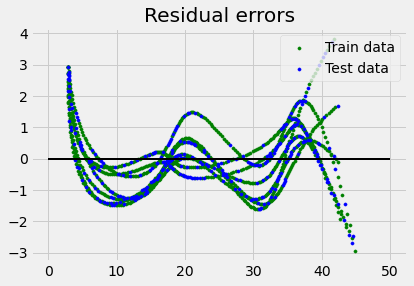

In [29]:
## plotting residual errors in training data

plt.style.use('fivethirtyeight')
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')

plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

# Training the ML Model (Random Forest)

In [42]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
scores = []
for k in range(15, 255):
  regressor = RandomForestRegressor(n_estimators = k, random_state = 6)

  regressor.fit(X_train, y_train)
  predictions = regressor.predict(X_test)
  errors = abs(predictions - y_test)
  y_test[y_test == 0] = 0.0000000001
  mape = 100 * (errors / y_test)
  accuracy = 100 - np.mean(mape)
  if(accuracy<80) : scores.append(0)
  else : scores.append(round(accuracy, 2))


RandomForestRegressor(n_estimators=170, random_state=6)

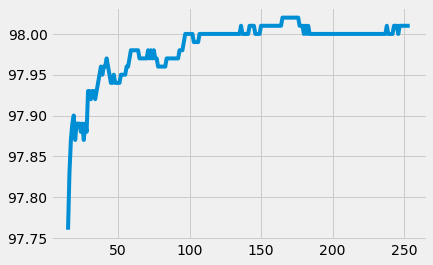

In [44]:
plt.plot(range(15, 255), scores)

regressor = RandomForestRegressor(n_estimators = 170, random_state = 6)
regressor.fit(X_train, y_train)

In [45]:
# Use the forest's predict method on the test data
predictions = regressor.predict(X_test)

# Calculate mean absolute error (mae)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))

#Replace 0 in y_test with small value to avoid divide by 0 error
y_test[y_test == 0] = 0.0000000001

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate accuracy
accuracy = 100 - np.mean(mape)
print('\nAccuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 0.21

Accuracy: 98.02 %.


#Hyperparamter Tuning

In [51]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 400, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [20, 62, 104, 146, 188, 231, 273, 315, 357, 400], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [52]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 62, 104, 146, 188,
                                                         231, 273, 315, 357,
                                                         400]},
                   random_state=42, verbose=2)

In [60]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.\n'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 15, random_state = 21)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Model Performance
Average Error: 0.2174.
Accuracy = 97.89%.

Model Performance
Average Error: 0.2055.
Accuracy = 98.01%.

Improvement of 0.12%.
